<a href="https://colab.research.google.com/github/urmiMahapatra/customer_churn_project/blob/main/customer_churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project : Customer Churn

 Problem Statement:
 You are the data scientist at a telecom company named “Neo” whose customers
 are churning out to its competitors. You have to analyze the data of your
 company and find insights and stop your customers from churning out to other
 telecom companies.
 Customer_churn Dataset:
 The details regarding this ‘customer_churn’ dataset are present in the data
 din Tasks To Be Performed:
 1. Data Manipulation:
 ● Extract the 5th column and store it in ‘customer_5’
 ● Extract the 15th column and store it in ‘customer_15’
 ● Extract all the male senior citizens whose payment method is electronic
 check and store the result in ‘senior_male_electronic’
 ● Extract all those customers whose tenure is greater than 70 months or
 their monthly charges is more than $100 and store the result in
 ‘customer_totaltion Course
 ● Extract all the customers whose contract is of two years, payment method
 is mailed check and the value of churn is ‘Yes’ and store the result in
 ‘two_mail_yes’
 ● Extract 333 random records from the customer_churndataframe and store
 the result in ‘customer_333’
 ● Get the count of different levels from the ‘Churn’ column
 2. Data Visualization:
 ● Build a bar-plot for the ’InternetService’ column:
 a. Set x-axis label to ‘Categories of Internet Service’
 b. Set y-axis label to ‘Count of Categories’
 c. Set the title of plot to be ‘Distribution of Internet Service’
 d. Set the color of the bars to be ‘orange’
 ● Build a histogram for the ‘tenure’ column:
 a. Set the number of bins to be 30
 b. Set the color of the bins to be ‘green’
 c. Assign the title ‘Distribution of tenure’
 ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
 ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
 a. Assign the points a color of ‘brown’
 b. Set the x-axis label to ‘Tenure of customer’
 c. Set the y-axis label to ‘Monthly Charges of customer’
 d. Set the title to ‘Tenure vs Monthly Charges’
 e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
 y-axis &
 f. ‘Contract’ on the x-axis.
 3. Linear Regression:
 ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
 and independent variable is ‘tenure’:
 a. Divide the dataset into train and test sets in 70:30 ratio.
 b. Build the model on train set and predict the values on test set
 c. After predicting the values, find the root mean square error
 d. Find out the error in prediction & store the result in ‘t
Python for Data Science Certification Course
 4. Logistic Regression:
 ● Build a simple logistic regression model where dependent variable is
 ‘Churn’ and independent variable is ‘MonthlyCharges’:
 a. Divide the dataset in 65:35 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and get the accuracy score
 d. Build a multiple logistic regression model where dependent variable
 is
 ‘Churn’ and independent variables are ‘tenure’ and
 ‘MonthlyCharges’
 e. Divide the dataset in 80:20 ratio
 f. Build the model on train set and predict the values on test set
 g. Build the confusion matrix and get the accuracy score
 5. Decision Tree:
 ● Build a decision tree model where dependent variable is ‘Churn’ and
 independent variable is ‘tenure’:
 a. Divide the dataset in 80:20 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and calculate the accuracy
 6. Random Forest:
 ● Build a Random Forest model where dependent variable is ‘Churn’ and
 independent variables are ‘tenure’ and ‘MonthlyCharges’:
 a. Divide the dataset in 70:30 ratio
 b. Build the model on train set and predict the value

In [ ]:
# importing all the libreries which are needed for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data= pd.read_csv("customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 1. Data Manipulation:
 ● Extract the 5th column and store it in ‘customer_5’
 ● Extract the 15th column and store it in ‘customer_15’
 ● Extract all the male senior citizens whose payment method is electronic
 check and store the result in ‘senior_male_electronic’
 ● Extract all those customers whose tenure is greater than 70 months or
 their monthly charges is more than $100 and store the result in
 ‘customer_total_tenure’

 ● Extract all the customers whose contract is of two years, payment method
 is mailed check and the value of churn is ‘Yes’ and store the result in
 ‘two_mail_yes’
 ● Extract 333 random records from the customer_churndataframe and store
 the result in ‘customer_333’
 ● Get the count of different levels from the ‘Churn’ column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
new_data=pd.DataFrame()

In [ ]:
# ● Extract the 5th column and store it in ‘customer_5’
customer_5 = pd.DataFrame(data.iloc[:,4])

# ● Extract the 15th column and store it in ‘customer_15’
customer_15= pd.DataFrame(data.iloc[:,15])

# ● Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic= data[(data["SeniorCitizen"]==1) & (data["gender"]=="Male") & (data["PaymentMethod"]=="Electronic check")]


In [ ]:
# ● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in‘customer_total_tenure’
customer_total_tenure= pd.DataFrame()

customer_total_tenure=  data[(data["tenure"]>70) | (data["MonthlyCharges"]>100)]


In [ ]:
# ● Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

two_mail_yes= pd.DataFrame()
two_mail_yes = data[(data["Contract"]==2) & (data["PaymentMethod"]=="Mailed check") &(data["Churn"]=="Yes")]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
 #● Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
# when  random number we select we need to add sample formula for that.
customer_333 = data.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5040,9909-IDLEK,Male,0,Yes,Yes,20,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,No,Mailed check,96.80,1826.7,No
6723,2068-WWXQZ,Male,0,No,No,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,902,No
4782,6175-IRFIT,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,78.75,426.35,No
3891,7995-ZHHNZ,Male,0,Yes,No,42,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),56.10,2386.85,No
1954,5834-ASPWA,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.45,75.45,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,9778-OGKQZ,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.00,6782.15,No
4262,5485-WUYWF,Male,1,No,No,2,Yes,No,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),66.40,94.55,Yes
5211,8382-SHQEH,Female,0,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.90,764.95,Yes
603,2001-MCUUW,Male,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,No


In [ ]:
#  ● Get the count of different levels from the ‘Churn’ column
data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 2. Data Visualization:
 ● Build a bar-plot for the ’InternetService’ column:
 a. Set x-axis label to ‘Categories of Internet Service’
 b. Set y-axis label to ‘Count of Categories’
 c. Set the title of plot to be ‘Distribution of Internet Service’
 d. Set the color of the bars to be ‘orange’
 ● Build a histogram for the ‘tenure’ column:
 a. Set the number of bins to be 30
 b. Set the color of the bins to be ‘green’
 c. Assign the title ‘Distribution of tenure’
 ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
 ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
 a. Assign the points a color of ‘brown’
 b. Set the x-axis label to ‘Tenure of customer’
 c. Set the y-axis label to ‘Monthly Charges of customer’
 d. Set the title to ‘Tenure vs Monthly Charges’
 e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
 y-axis &
 f. ‘Contract’ on the x-axis.

###  ● Build a bar-plot for the ’InternetService’ column:
 a. Set x-axis label to ‘Categories of Internet Service’
 b. Set y-axis label to ‘Count of Categories’
 c. Set the title of plot to be ‘Distribution of Internet Service’
 d. Set the color of the bars to be ‘orange’

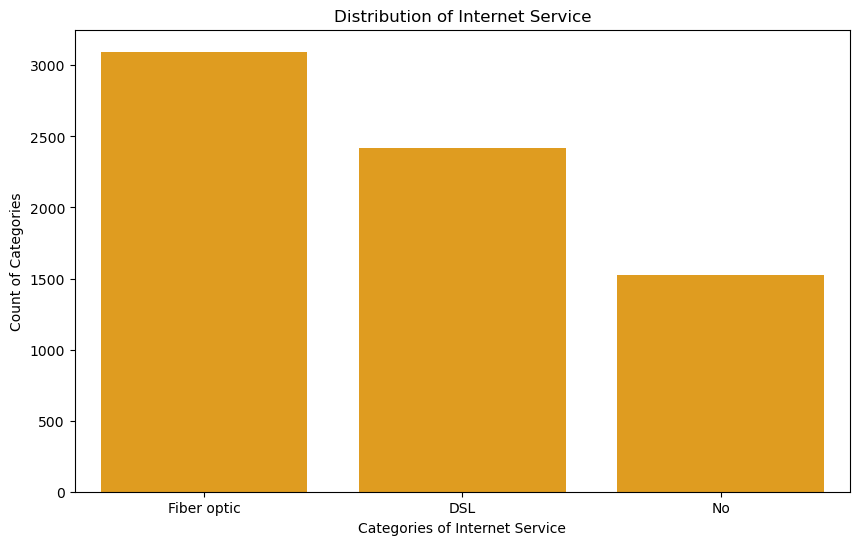

In [ ]:
internet_service_values=data["InternetService"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=internet_service_values.index,y=internet_service_values.values,color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()


###  ● Build a histogram for the ‘tenure’ column:
 a. Set the number of bins to be 30
 b. Set the color of the bins to be ‘green’
 c. Assign the title ‘Distribution of tenure’

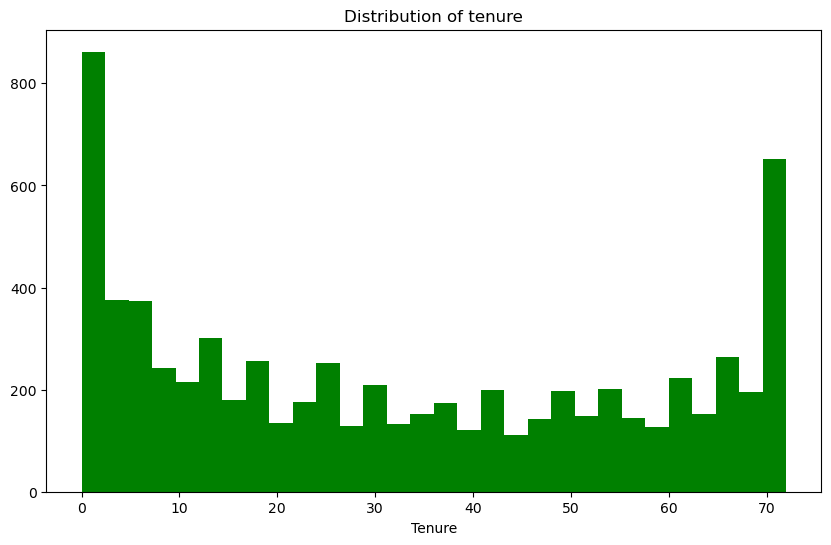

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data["tenure"],bins=30,color="green")
plt.xlabel("Tenure")
plt.title("Distribution of tenure")
plt.show()


##  ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’.
Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
 a. Assign the points a color of ‘brown’
 b. Set the x-axis label to ‘Tenure of customer’
 c. Set the y-axis label to ‘Monthly Charges of customer’
 d. Set the title to ‘Tenure vs Monthly Charges’
 e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
 y-axis &
 f. ‘Contract’ on the x-axis.

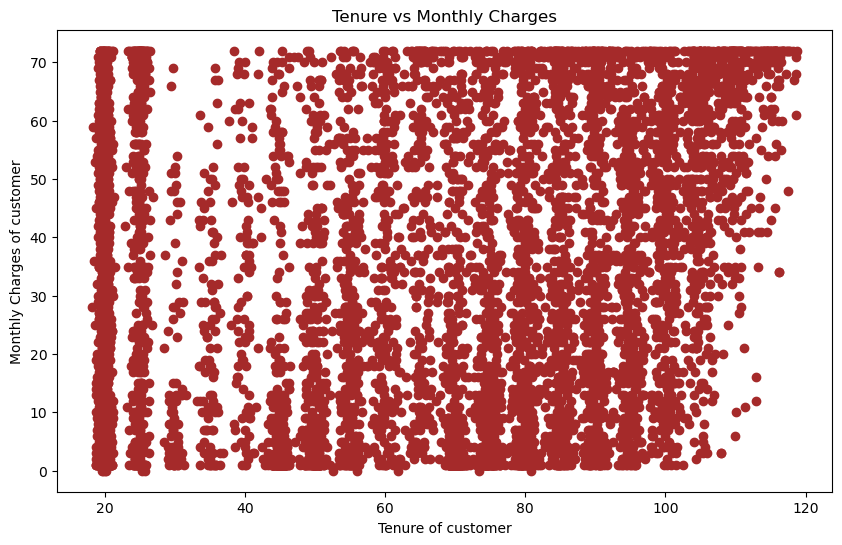

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data["MonthlyCharges"],data["tenure"],c="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

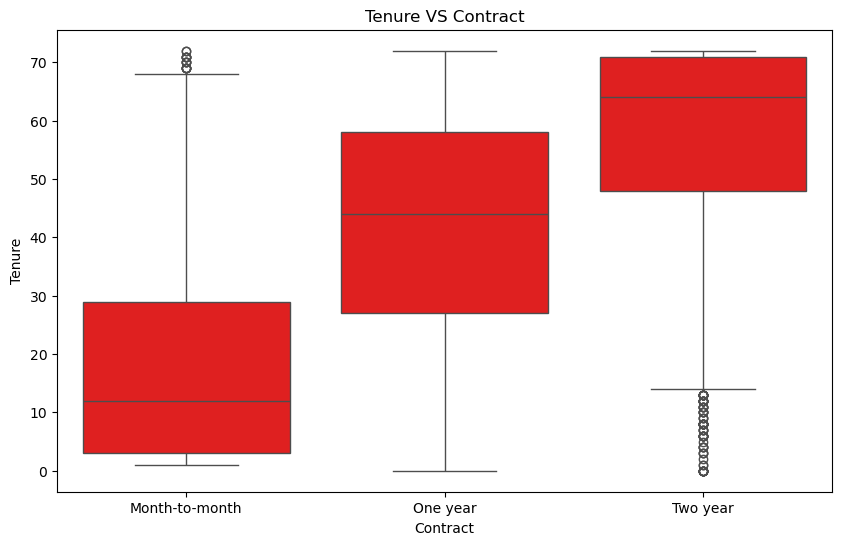

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data["tenure"],x=data["Contract"],color= "red")
plt.xlabel("Contract")
plt.ylabel("Tenure")
plt.title("Tenure VS Contract")
plt.show()

## EDA


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# cgange the datatype from float to float

data["TotalCharges"]= pd.to_numeric(data["TotalCharges"],errors="coerce")
data["TotalCharges"]= data["TotalCharges"].astype(float)

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:

# delete the null values from TotalCharges columns
data.dropna(subset="TotalCharges",inplace=True,axis=0)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: ylabel='MonthlyCharges'>

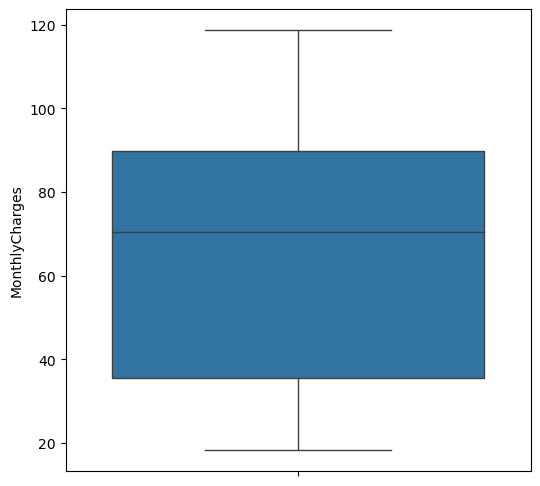

In [ ]:

# check the outliers

plt.figure(figsize=(6,6))

sns.boxplot(data["MonthlyCharges"])



<Axes: ylabel='tenure'>

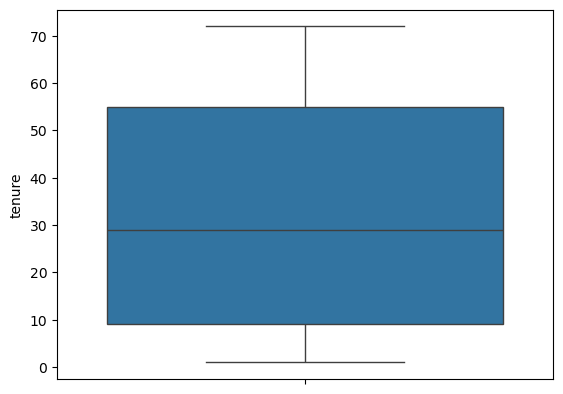

In [ ]:
sns.boxplot(data["tenure"])

In [ ]:
# label encoding
le= LabelEncoder()
for i in data.columns:
    if data[i].dtype == "object":
        data[i]=le.fit_transform(data[i])

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1524,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3358,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5923,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
# standardized the column

sc= StandardScaler()
scaled_data=sc.fit_transform(data)

## 3. Linear Regression:
 ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
 and independent variable is ‘tenure’:
 a. Divide the dataset into train and test sets in 70:30 ratio.
 b. Build the model on train set and predict the values on test set
 c. After predicting the values, find the root mean square error
  d. Find out the error in prediction & store the result in ‘error’
 e. Find the root mean square error


In [ ]:
X= data["tenure"]
y= data["MonthlyCharges"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# to reshape the values of X for avoid the error
x_train= x_train.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)

In [ ]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_linear=linear.predict(x_test)

In [ ]:

RMSE= sqrt(mean_squared_error(y_test,y_pred_linear))
RMSE

28.970721349228278

In [ ]:
result=pd.DataFrame()
result["Actual Charges"]=y_test
result["predicted Charges"]=y_pred_linear
result["Error"]= (y_test- y_pred_linear)
result

,Actual Charges,predicted Charges,Error
2481,25.00,72.994813,-47.994813
6784,24.70,60.643647,-35.943647
6125,102.25,58.879195,43.370805
3052,55.05,65.937004,-10.887004
4099,29.45,56.820667,-27.370667
...,...,...,...
2763,81.05,73.877040,7.172960
6747,35.45,70.348135,-34.898135
1700,20.45,68.877758,-48.427758
1099,55.70,56.526592,-0.826592


In [ ]:
RMSE= sqrt(mean_squared_error(y_test,y_pred_linear))
RMSE

28.970721349228278

## 4. Logistic Regression:
 ● Build a simple logistic regression model where dependent variable is
 ‘Churn’ and independent variable is ‘MonthlyCharges’:
 a. Divide the dataset in 65:35 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and get the accuracy score
 d. Build a multiple logistic regression model where dependent variable
 is
 ‘Churn’ and independent variables are ‘tenure’ and
 ‘MonthlyCharges’
 e. Divide the dataset in 80:20 ratio
 f. Build the model on train set and predict the values on test set
 g. Build the confusion matrix and get the accuracy score

In [ ]:
# Build a simple logistic regression model where dependent variable is
# ‘Churn’ and independent variable is ‘MonthlyCharges’:

X=data["MonthlyCharges"]
y=data["Churn"]

In [ ]:
# Divide the dataset in 65:35 ratio
 x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [ ]:
# to reshape the values of X for avoid the error
x_train= x_train.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)

In [ ]:
# Build the model on train set and predict the values on test set

log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_logistic=log.predict(x_test)

In [ ]:
#Build the confusion matrix and get the accuracy score

confusion_matrix= confusion_matrix(y_test,y_pred_logistic)
confusion_matrix

array([[1824,    0],
       [ 638,    0]], dtype=int64)

In [ ]:
accuracy_score= accuracy_score(y_test,y_pred_logistic)
accuracy_score

0.7408610885458976

In [ ]:
# Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’

y=data["Churn"]
X=data[["MonthlyCharges","tenure"]]

In [ ]:
# Divide the dataset in 80:20 ratio

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [ ]:
#Build the model on train set and predict the values on test set
log.fit(x_train,y_train)
y_pred_logistic_number2=log.predict(x_test)
y_pred_logistic_number2

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#Build the confusion matrix and get the accuracy score

confusion_matrix1= confusion_matrix(y_test,y_pred_logistic_number2)
confusion_matrix1

array([[938,  95],
       [215, 159]], dtype=int64)

In [ ]:
accuracy_score1= accuracy_score(y_test,y_pred_logistic_number2)
accuracy_score1

0.7796730632551528

 ## 5. Decision Tree:
 ● Build a decision tree model where dependent variable is ‘Churn’ and
 independent variable is ‘tenure’:
 a. Divide the dataset in 80:20 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and calculate the accuracy

In [ ]:
# ● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’

X= data["tenure"]
y=data["Churn"]

In [ ]:
#a. Divide the dataset in 80:20 ratio
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)


In [ ]:
# reshape of x_train and x_test

x_train= x_train.reshape(-1,1)
x_test= x_test.reshape(-1,1)

In [ ]:
# b. Build the model on train set and predict the values on test set

dec_tree= DecisionTreeClassifier(max_depth=4,max_leaf_nodes=5)
dec_tree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)

In [ ]:
y_pred_dec_tree= dec_tree.predict(x_test)
y_pred_dec_tree

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# c. Build the confusion matrix and calculate the accuracy
con_matrix= confusion_matrix(y_test,y_pred_dec_tree)
con_matrix

array([[1402,  147],
       [ 335,  226]], dtype=int64)

In [ ]:
Acc_score= accuracy_score(y_test,y_pred_dec_tree)
Acc_score

0.771563981042654

##  6. Random Forest:
 Build a Random Forest model where dependent variable is ‘Churn’ and
 independent variables are ‘tenure’ and ‘MonthlyCharges’:
 a. Divide the dataset in 70:30 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and calculate the accuracy

In [ ]:
# Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
X=data[["MonthlyCharges","tenure"]]
y=data["Churn"]


In [ ]:
# a. Divide the dataset in 70:30 ratio

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:

# b. Build the model on train set and predict the values on test set

rf=RandomForestClassifier(n_estimators=25,max_depth=6,min_samples_split=2,min_samples_leaf=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_estimators=25)

In [ ]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
conf_matrix= confusion_matrix(y_test,y_pred_rf)
conf_matrix

array([[1409,  140],
       [ 317,  244]], dtype=int64)

In [ ]:
Acc_score= accuracy_score(y_test,y_pred_rf)
Acc_score

0.7834123222748816